# 01. Librería y Datos

In [ ]:
!pip install mglearn

     |████████████████████████████████| 540 kB 5.2 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=b387039a1717db5e3b333ec7021dae20a271f6c7ee3134baa39f29894c3bd406
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import mglearn



In [ ]:
df_ubicaciones= pd.read_csv("/content/drive/MyDrive/Universidad/Tercer Semestre/10K Challenge/Poblacion_Aleatoria_Clasificada.csv")
df_ubicaciones.head()

,X,geometry,Longitud,Latitud,Municipio,Poblacion,DistanciaHospital,nUnidades,ConsultoriosG,ConsultoriosO,CamasH,CamasO,Division,DistanciaBajo,DistanciaAlto,Is_Alto
0,0,POINT (-5897334.475580929 -6438420.141012958),-99.411325,19.414971,Lerma,170327,9250.657443,4,6,6,0,4,0.000023,3749.350825,4250.696731,False
1,1,POINT (-6024265.267600001 -6259259.868778107),-99.867642,19.784078,Atlacomulco,109384,1757.673911,10,13,26,60,55,0.000091,11242.657422,3242.998993,True
2,2,POINT (-5615930.730808745 -6344685.510352412),-98.725791,19.824901,Nopaltepec,10351,11864.406740,2,3,1,0,0,0.000193,1135.594141,6864.449424,False
3,3,POINT (-5697757.150076834 -6394615.218432343),-98.911101,19.649067,Acolman,171507,5539.205846,12,18,14,0,0,0.000070,7460.827796,539.545128,True
4,4,POINT (-6162101.086462797 -6423527.525288753),-100.120311,19.283378,Donato Guerra,37436,9602.997349,2,4,1,0,0,0.000053,3397.003093,4603.058504,False


In [ ]:

def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(8, 8))
    sb.heatmap(conf_matrix, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

# 02. Clasificación por KNN

https://www.aprendemachinelearning.com/clasificar-con-k-nearest-neighbor-ejemplo-en-python/

In [ ]:
X = df_ubicaciones[['Longitud','Latitud']].values
y = df_ubicaciones['Is_Alto'].values
 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
n_neighbors = 7

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Eficiencia de KNN en los datos de entrenamiento: {:.4f}'
     .format(knn.score(X_train, y_train)))
print('Eficiencia de KNN en los datos de prueba: {:.4f}'
     .format(knn.score(X_test, y_test)))

Eficiencia de KNN en los datos de entrenamiento: 0.9930
Eficiencia de KNN en los datos de prueba: 0.9880


In [ ]:
for i in range(1,21):
  n_neighbors = i
  print("Vecinos: " + str(n_neighbors))
  knn = KNeighborsClassifier(n_neighbors)
  knn.fit(X_train, y_train)
  precisionEntrenamiento= knn.score(X_train, y_train)
  precisionPrueba= knn.score(X_test, y_test)
  print('Precisión de KNN en los datos de entrenamiento: {:.4f}'
      .format(precisionEntrenamiento))
  print('Precisión de KNN en los datos de prueba: {:.4f}'
      .format(precisionPrueba))
  print("Precisión Promedio: {:.4f}".format((precisionEntrenamiento+precisionPrueba)/2))

Vecinos: 1
Precisión de KNN en los datos de entrenamiento: 1.0000
Precisión de KNN en los datos de prueba: 0.9906
Precisión Promedio: 0.9953
Vecinos: 2
Precisión de KNN en los datos de entrenamiento: 0.9947
Precisión de KNN en los datos de prueba: 0.9873
Precisión Promedio: 0.9910
Vecinos: 3
Precisión de KNN en los datos de entrenamiento: 0.9957
Precisión de KNN en los datos de prueba: 0.9894
Precisión Promedio: 0.9925
Vecinos: 4
Precisión de KNN en los datos de entrenamiento: 0.9931
Precisión de KNN en los datos de prueba: 0.9878
Precisión Promedio: 0.9905
Vecinos: 5
Precisión de KNN en los datos de entrenamiento: 0.9939
Precisión de KNN en los datos de prueba: 0.9884
Precisión Promedio: 0.9911
Vecinos: 6
Precisión de KNN en los datos de entrenamiento: 0.9927
Precisión de KNN en los datos de prueba: 0.9876
Precisión Promedio: 0.9901
Vecinos: 7
Precisión de KNN en los datos de entrenamiento: 0.9930
Precisión de KNN en los datos de prueba: 0.9880
Precisión Promedio: 0.9905
Vecinos: 8
Pr

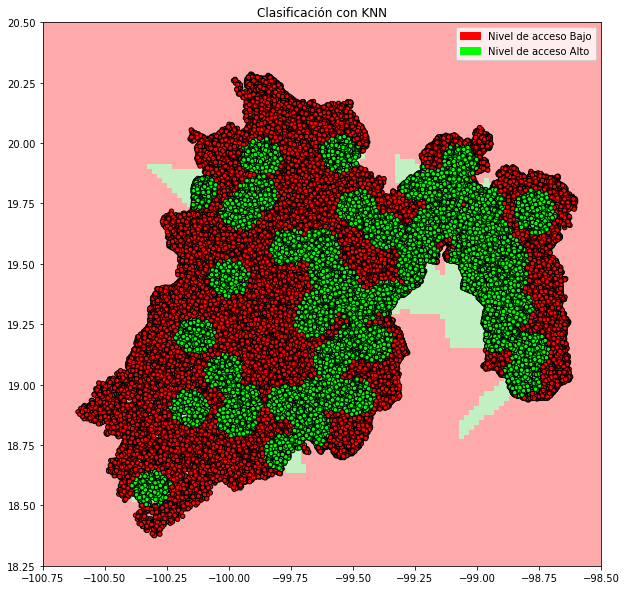

In [ ]:
h=0.02
n_neighbors = 7

# Create color maps
cmap_light = ListedColormap(['#FFAAAA','#c2f0c2'])
cmap_bold = ListedColormap(['#FF0000','#00FF00'])
 
# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)
 
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 10))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(-100.75, -98.5)
plt.ylim(18.25, 20.5)
    
patch0 = mpatches.Patch(color='#FF0000', label='Nivel de acceso Bajo')
patch1 = mpatches.Patch(color='#00FF00', label='Nivel de acceso Alto')
plt.legend(handles=[patch0, patch1])
 
    
plt.title("Clasificación con KNN")
 
plt.show()

# 03. Clasificación por Random Forest

https://github.com/jbagnato/machine-learning/blob/master/Ejercicio_Random_Forest.ipynb

In [ ]:
X = df_ubicaciones[['Longitud','Latitud']].values
y = df_ubicaciones['Is_Alto'].values
 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,verbose=2,
                               max_features = 'sqrt')
model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.8s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=2, warm_start=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


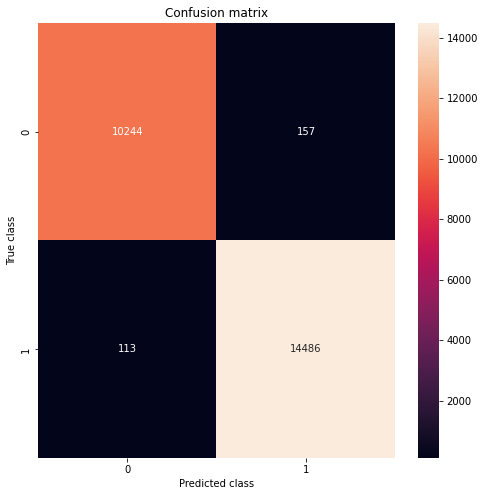

              precision    recall  f1-score   support

       False       0.99      0.98      0.99     10401
        True       0.99      0.99      0.99     14599

    accuracy                           0.99     25000
   macro avg       0.99      0.99      0.99     25000
weighted avg       0.99      0.99      0.99     25000



In [ ]:
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.3s finished


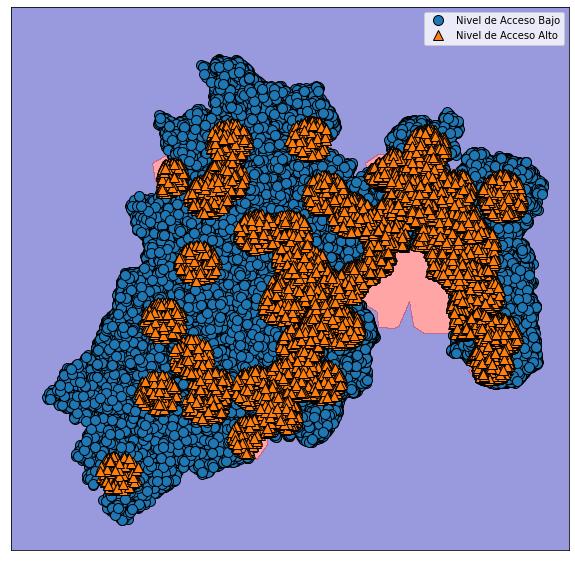

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(10, 10))
mglearn.plots.plot_2d_separator(model, X_train, fill=True,
alpha=.4,ax=axes)
axes.set_xlim(-100.75, -98.5)
axes.set_ylim(18.25, 20.5)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
axes.legend(["Nivel de Acceso Bajo","Nivel de Acceso Alto"])

 # 04. Clasificación por Regresión Logística

In [ ]:
def run_model_balanced(X_train, X_test, y_train, y_test):
    clf = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")
    clf.fit(X_train, y_train)
    return clf

model = run_model_balanced(X_train, X_test, y_train, y_test)

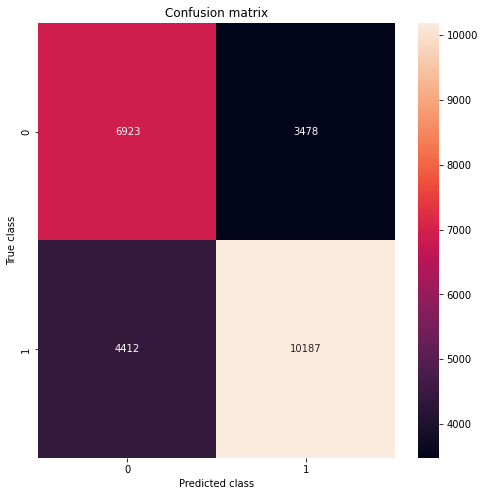

              precision    recall  f1-score   support

       False       0.61      0.67      0.64     10401
        True       0.75      0.70      0.72     14599

    accuracy                           0.68     25000
   macro avg       0.68      0.68      0.68     25000
weighted avg       0.69      0.68      0.69     25000



In [ ]:
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)